In this notebook i will analyze the Major crime indicators in the city of Toronto from the year 2014-2018, by the end of this notebook i will have a list of neighbourhoods in which the Major crime indicators are the highest and hence those areas should probably be avoided to the cautious traveller. let us start by importing the libraries we are going to be require for this project.

In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

import re #regular expression matching operations

import folium #maping crime on the map
from folium.plugins import HeatMap, MarkerCluster #making maping visually appealing

%matplotlib inline

## Loading the Data


In [2]:
crime = pd.read_csv('toronto_crime1.csv')
crime = crime.drop(columns = "Unnamed: 0")

The original data set already breaks down occurrencedate (yyy-MM-dd HH"T":mm:ss.SSS'Z') into marginal time categories, i.e. year, month, hour, etc. However, I wanted to show how easily Python and panadas can generate these variables from the string format.

In [3]:
crime["datetime"] = pd.to_datetime(crime["occurrencedate"])

crime['year'] = crime['datetime'].dt.year
crime['month'] = crime['datetime'].dt.month
crime['dayofweek'] = crime['datetime'].dt.dayofweek
crime['hour'] = crime['datetime'].dt.hour

In [5]:
crime["MCI"] = crime["MCI"].astype('category')

For this project i am only going to focus on General sorts of crime and Assaults which occur in the neighbourhoods of Toronto and make a list of that neighbourhood. For that i would need to Generate values and labels for Crime first, so lets do that.

In [6]:
values_crime = crime["MCI"].value_counts() 
labels_crime = crime["MCI"].value_counts().keys()

Now i am going to do the same for offence which are assaults.

In [8]:
crime_assault = crime[crime["offence"].str.contains('ASSAULT', flags=re.IGNORECASE, regex=True)] 

values_assault = crime_assault["offence"].value_counts() 

for key,value in values_assault.iteritems(): 
    if value < 1500:
       values_assault= pd.DataFrame(values_assault.rename({key: "other"}))


values_assault=values_assault.groupby(values_assault.index).sum().sort_values("offence",ascending=False) 

labels_assault = values_assault.index

I am now going to visualise the values_assault values and see what that looks like 

<ipython-input-9-1e874ff3a51c>:17: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(values_assault, autopct='%1.1f%%',pctdistance=0.85, startangle=90, explode = [0.05]*labels_assault.shape[0])


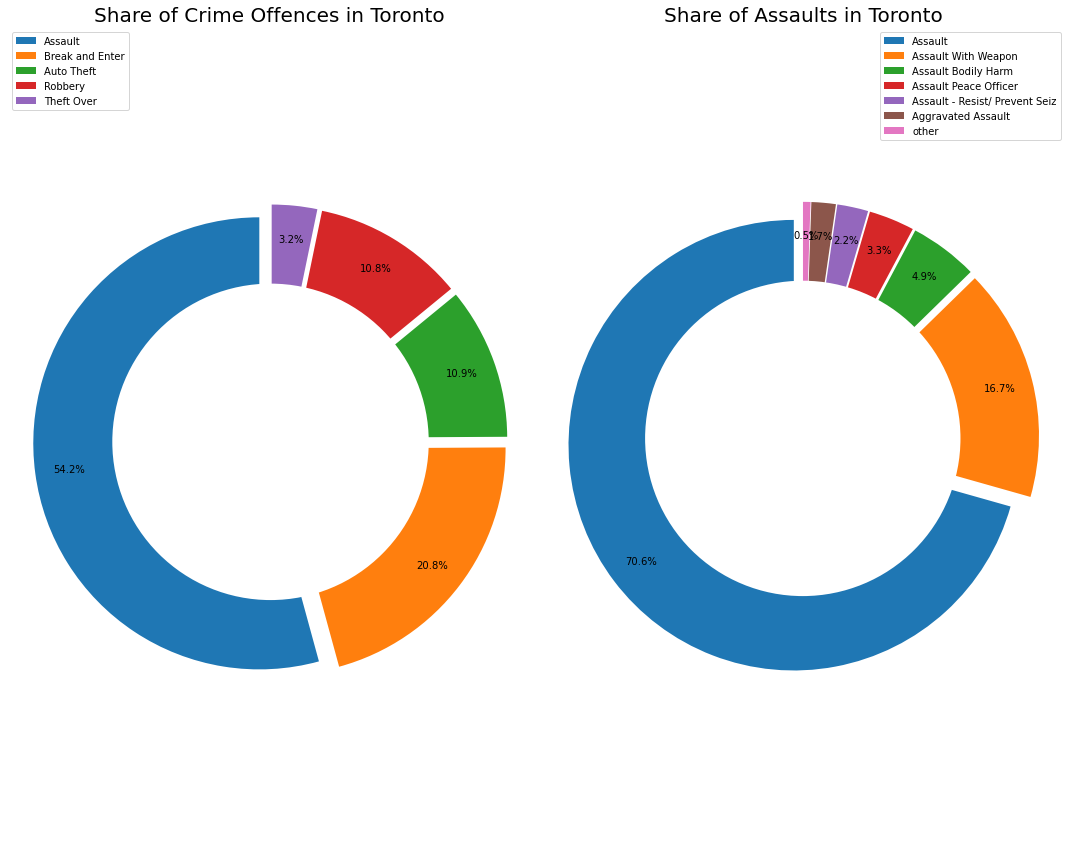

In [9]:
plt.figure(num=None, figsize=(15, 12))

plt.subplot(1,2,1)
plt.pie(values_crime, autopct='%1.1f%%', pctdistance=0.85, startangle=90, explode = [0.05]*labels_crime.shape[0])

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Share of Crime Offences in Toronto",size=20)
plt.legend(labels_crime,loc=2)

plt.axis('equal')  
plt.tight_layout()

plt.subplot(1,2,2)
plt.pie(values_assault, autopct='%1.1f%%',pctdistance=0.85, startangle=90, explode = [0.05]*labels_assault.shape[0])
    
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Share of Assaults in Toronto",size=20)
plt.legend(labels_assault,loc=1)

plt.axis('equal')  
plt.tight_layout()

plt.show()

As we can see here that out of all the crimes that take place in Toronto 54.2% of them are assaults, and out of all the assaults that take place in Toronto 70.6% of them are regular assault and 16.7% of them are assault with weapon, now mind you a weapon doesnt necessarily mean a gun it just means something that can be used to inflict bodily harm to another person.

## Mapping crime in Toronto

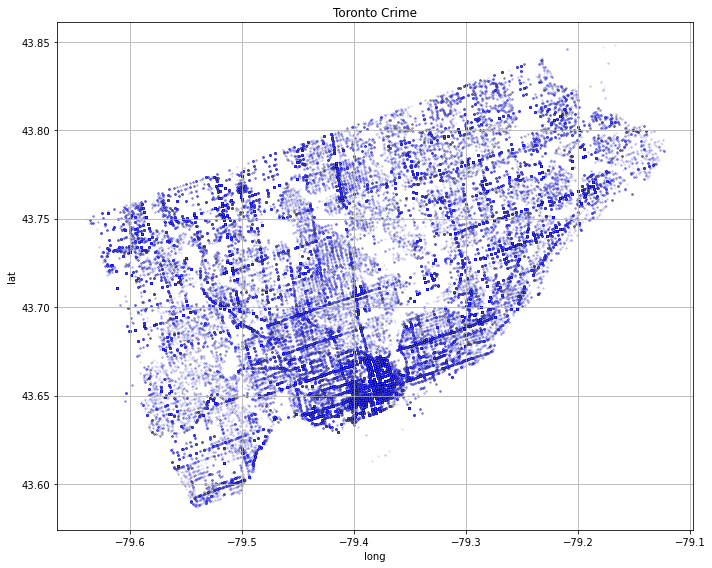

In [13]:
plt.figure(num=None, figsize=(10, 8))
plt.scatter("Long", "Lat", data = crime, c = 'y',alpha = 0.1, edgecolor = 'blue', s=2)
plt.grid()
plt.xlabel('long')
plt.ylabel('lat')
plt.title('Toronto Crime')
plt.tight_layout()
plt.axis('tight')

plt.show()

Firstly, there are a few high-density areas on the map. The most evident one is in the south of the City – downtown. The neighborhoods around also exhibit high criminal activity and there are also other spots suggesting criminal neighborhoods can be clustered.

Now that we know that where most crimes take place let us come up with a list of neighbourhoods which one should avoid if he / she is a cautious traveller. 

In [14]:
top_N = crime.groupby('Neighbourhood')[['MCI']].count().sort_values(by=['MCI'])

map_data = crime[['Neighbourhood', 'Lat', 'Long']].drop_duplicates('Neighbourhood').set_index('Neighbourhood') \
    .join(top_N, how='inner')

In [16]:
map_data.sort_values(by=['MCI'], ascending=False).head(20)

,Lat,Long,MCI
Neighbourhood,,,
Church-Yonge Corridor (75),43.663906,-79.384155,6301
Waterfront Communities-The Island (77),43.644955,-79.397644,5674
West Humber-Clairville (1),43.743992,-79.598869,4338
Moss Park (73),43.657307,-79.373459,3609
Bay Street Corridor (76),43.658077,-79.384712,3564
Kensington-Chinatown (78),43.650070,-79.396881,3263
Woburn (137),43.777592,-79.226578,3158
York University Heights (27),43.774353,-79.499802,3141
Downsview-Roding-CFB (26),43.733581,-79.483727,2974


As we can see here that Church-Yonge corridor is the neighbourhood with the highest MCI(major crime indicator) so we'll stay clear of that area. :)

Let us now map these neighbourhoods in a map 

In [17]:
m = folium.Map(
    location=[43.702270, -79.366074],
    zoom_start=11
)

cluster = MarkerCluster().add_to(m)

for x in map_data.iterrows():
    folium.Marker([x[1].Lat, x[1].Long]).add_to(cluster)
    
max_crime = map_data['MCI'].max() 
heat = HeatMap(map_data.values,
                min_opacity=0.2,
                max_val=max_crime,
                radius=30, blur=20, 
                max_zoom=11)

m 

Alright so now we have a good idea of which area to not go visit let us now get an idea of which places we can visit, for this i will use another dataset and then perform k means clustering to get the most common venues in that neighbourhood. lets do it.

In [18]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import matplotlib.colors as colors
import matplotlib.cm as cm
from geopy.geocoders import Nominatim 
import os
import folium 
from sklearn.cluster import KMeans

## Loading Data

In [19]:
List_url='https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
source = requests.get(List_url).text

In [20]:
soup = BeautifulSoup(source, 'xml')
table=soup.find('table')
column_names=['Postalcode','Borough','Neighborhood']
df = pd.DataFrame(columns=column_names)

In [21]:
for tr_cell in table.find_all('tr'):
    row_data=[]
    for td_cell in tr_cell.find_all('td'):
        row_data.append(td_cell.text.strip())
    if len(row_data)==3:
        df.loc[len(df)] = row_data


In [22]:
df.head()

,Postalcode,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


As we can see here that there are some boroughs which names are not assigned so lets just fix that really quick.

In [23]:
df=df[df['Borough']!='Not assigned']

In [24]:
df.head()

,Postalcode,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [25]:
temp_df=df.groupby('Postalcode')['Neighborhood'].apply(lambda x: "%s" % ', '.join(x))
temp_df=temp_df.reset_index(drop=False)
temp_df.rename(columns={'Neighborhood':'Neighborhood_joined'},inplace=True)

In [26]:
df_merge = pd.merge(df, temp_df, on='Postalcode') 

In [27]:
df_merge.drop(['Neighborhood'],axis=1,inplace=True)

In [28]:
df_merge.drop_duplicates(inplace=True)

In [29]:
df_merge.rename(columns={'Neighborhood_joined':'Neighborhood'},inplace=True)

In [31]:
df_merge.head(10)

,Postalcode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


so we now have the merged dataframe of the neighbourhoods that are in Toronto let us also get the coordinates of those neighbourhoods now. for that i will use a geo json file.

In [32]:
def get_geocode(postal_code):
    lat_lng_coords = None
    while(lat_lng_coords is None):
        g = geocoder.google('{}, Toronto, Ontario'.format(postal_code))
        lat_lng_coords = g.latlng
    latitude = lat_lng_coords[0]
    longitude = lat_lng_coords[1]

In [33]:
geo_df=pd.read_csv('http://cocl.us/Geospatial_data')

In [34]:
geo_df.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [35]:
geo_df.rename(columns={'Postal Code':'Postalcode'},inplace=True)
geo_merged = pd.merge(geo_df, df_merge, on='Postalcode')

In [36]:
geo_merged.head()

,Postalcode,Latitude,Longitude,Borough,Neighborhood
0,M1B,43.806686,-79.194353,Scarborough,"Malvern, Rouge"
1,M1C,43.784535,-79.160497,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,43.763573,-79.188711,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,43.770992,-79.216917,Scarborough,Woburn
4,M1H,43.773136,-79.239476,Scarborough,Cedarbrae


In [37]:
geo_data=geo_merged[['Postalcode','Borough','Neighborhood','Latitude','Longitude']]
geo_data.head()

,Postalcode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


Let us now acquire the neighbourhoods and the coordinates of those neighbourhoods which are in Toronto.

In [38]:
toronto_data=geo_data[geo_data['Borough'].str.contains("Toronto")]
toronto_data.head()

,Postalcode,Borough,Neighborhood,Latitude,Longitude
37,M4E,East Toronto,The Beaches,43.676357,-79.293031
41,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
42,M4L,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572
43,M4M,East Toronto,Studio District,43.659526,-79.340923
44,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790


we now have the names of the neighbourhoods which are in Toronto, now i will use Foursquare API to get a list of the most common venues in those neighbourhoods. 

In [39]:
CLIENT_ID = 'X4VYTNQJJRC2RELUVIH3AJGUSNMUXHAFVHHXE5E12QL3AOD0'
CLIENT_SECRET = '1T1HLRSA1SB2HEUZCL0IV52RTTPKBYV4A4VULLEZMUI2PFEX' 
VERSION = '20180604'

In [41]:
def getNearbyVenues(names, latitudes, longitudes):
    radius=500
    LIMIT=100
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
        
    return(nearby_venues)

Lets get the Venues in Toronto using Foursquare API

In [42]:
toronto_venues = getNearbyVenues(names=toronto_data['Neighborhood'],
                                   latitudes=toronto_data['Latitude'],
                                   longitudes=toronto_data['Longitude']
                                  )

The Beaches
The Danforth West, Riverdale
India Bazaar, The Beaches West
Studio District
Lawrence Park
Davisville North
North Toronto West,  Lawrence Park
Davisville
Moore Park, Summerhill East
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
Rosedale
St. James Town, Cabbagetown
Church and Wellesley
Regent Park, Harbourfront
Garden District, Ryerson
St. James Town
Berczy Park
Central Bay Street
Richmond, Adelaide, King
Harbourfront East, Union Station, Toronto Islands
Toronto Dominion Centre, Design Exchange
Commerce Court, Victoria Hotel
Roselawn
Forest Hill North & West, Forest Hill Road Park
The Annex, North Midtown, Yorkville
University of Toronto, Harbord
Kensington Market, Chinatown, Grange Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
Stn A PO Boxes
First Canadian Place, Underground city
Christie
Dufferin, Dovercourt Village
Little Portugal, Trinity
Brockton, Parkdale Village, Exhibition Place
High

In [43]:
toronto_venues.head(10)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Beaches,43.676357,-79.293031,Glen Manor Ravine,43.676821,-79.293942,Trail
1,The Beaches,43.676357,-79.293031,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store
2,The Beaches,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub
3,The Beaches,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood
4,"The Danforth West, Riverdale",43.679557,-79.352188,MenEssentials,43.677820,-79.351265,Cosmetics Shop
5,"The Danforth West, Riverdale",43.679557,-79.352188,Pantheon,43.677621,-79.351434,Greek Restaurant
6,"The Danforth West, Riverdale",43.679557,-79.352188,Cafe Fiorentina,43.677743,-79.350115,Italian Restaurant
7,"The Danforth West, Riverdale",43.679557,-79.352188,Dolce Gelato,43.677773,-79.351187,Ice Cream Shop
8,"The Danforth West, Riverdale",43.679557,-79.352188,La Diperie,43.677530,-79.352295,Ice Cream Shop
9,"The Danforth West, Riverdale",43.679557,-79.352188,Moksha Yoga Danforth,43.677622,-79.352116,Yoga Studio


In [44]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berczy Park,56,56,56,56,56,56
"Brockton, Parkdale Village, Exhibition Place",23,23,23,23,23,23
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",16,16,16,16,16,16
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",18,18,18,18,18,18
Central Bay Street,65,65,65,65,65,65
Christie,16,16,16,16,16,16
Church and Wellesley,78,78,78,78,78,78
"Commerce Court, Victoria Hotel",100,100,100,100,100,100
Davisville,31,31,31,31,31,31


let us perform one hot encoding the Toronto venues data so that the dataframe is more expressive and easier to understand 

In [45]:
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

In [46]:
toronto_onehot['Neighborhood']=toronto_venues['Neighborhood']


In [47]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped.head()

,Neighborhood,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Berczy Park,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.017857,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
1,"Brockton, Parkdale Village, Exhibition Place",0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
2,"Business reply mail Processing Centre, South C...",0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.062500
3,"CN Tower, King and Spadina, Railway Lands, Har...",0.0,0.055556,0.055556,0.055556,0.111111,0.166667,0.111111,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
4,Central Bay Street,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.015385,0.0,0.0,0.015385,0.0,0.0,0.0,0.015385


Let us now look at the most common venues in all these neighbourhoods. 

In [48]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [51]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']


columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(10)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Coffee Shop,Cocktail Bar,Cheese Shop,Beer Bar,Bakery,Seafood Restaurant,Restaurant,Café,Clothing Store,Irish Pub
1,"Brockton, Parkdale Village, Exhibition Place",Café,Coffee Shop,Breakfast Spot,Bakery,Gym,Stadium,Burrito Place,Restaurant,Climbing Gym,Pet Store
2,"Business reply mail Processing Centre, South C...",Yoga Studio,Auto Workshop,Park,Pizza Place,Restaurant,Butcher,Burrito Place,Skate Park,Brewery,Comic Shop
3,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Service,Airport Lounge,Airport Terminal,Rental Car Location,Harbor / Marina,Plane,Boat or Ferry,Boutique,Bar,Sculpture Garden
4,Central Bay Street,Coffee Shop,Café,Italian Restaurant,Sandwich Place,Japanese Restaurant,Department Store,Salad Place,Burger Joint,Bubble Tea Shop,Indian Restaurant
5,Christie,Grocery Store,Café,Park,Coffee Shop,Nightclub,Candy Store,Baby Store,Italian Restaurant,Diner,Restaurant
6,Church and Wellesley,Coffee Shop,Sushi Restaurant,Japanese Restaurant,Restaurant,Gay Bar,Café,Pub,Men's Store,Mediterranean Restaurant,Hotel
7,"Commerce Court, Victoria Hotel",Coffee Shop,Restaurant,Café,Hotel,American Restaurant,Gym,Deli / Bodega,Japanese Restaurant,Seafood Restaurant,Italian Restaurant
8,Davisville,Dessert Shop,Sandwich Place,Sushi Restaurant,Café,Pizza Place,Coffee Shop,Gym,Italian Restaurant,Farmers Market,Diner
9,Davisville North,Gym,Hotel,Park,Food & Drink Shop,Sandwich Place,Department Store,Breakfast Spot,Gym / Fitness Center,Pizza Place,Convention Center


Run k means clutering on this dataset and make clusters of the neighbourhoods which we will later use to plot them on a map for a better understanding the common venues in Toronto

In [52]:

kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

kmeans.labels_[0:10]

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0])

Here i will add labels to my clusters which will be used to figure out in which label certain neighbourhoods fall into and i will merge my toronto_grouped with toronto_data to add the latitude and longitude for each neighbourhood

In [54]:

neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = toronto_data

toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head(10)

,Postalcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
37,M4E,East Toronto,The Beaches,43.676357,-79.293031,1,Trail,Health Food Store,Pub,Yoga Studio,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop
41,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,0,Greek Restaurant,Italian Restaurant,Coffee Shop,Bookstore,Restaurant,Ice Cream Shop,Furniture / Home Store,Yoga Studio,Bubble Tea Shop,Spa
42,M4L,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572,1,Sandwich Place,Fast Food Restaurant,Gym,Pet Store,Brewery,Burrito Place,Restaurant,Pub,Pizza Place,Movie Theater
43,M4M,East Toronto,Studio District,43.659526,-79.340923,0,Café,Coffee Shop,Brewery,Gastropub,Bakery,American Restaurant,Convenience Store,Seafood Restaurant,Sandwich Place,Cheese Shop
44,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790,3,Park,Swim School,Bus Line,Farmers Market,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop
45,M4P,Central Toronto,Davisville North,43.712751,-79.390197,0,Gym,Hotel,Park,Food & Drink Shop,Sandwich Place,Department Store,Breakfast Spot,Gym / Fitness Center,Pizza Place,Convention Center
46,M4R,Central Toronto,"North Toronto West, Lawrence Park",43.715383,-79.405678,0,Clothing Store,Coffee Shop,Yoga Studio,Chinese Restaurant,Spa,Sporting Goods Shop,Diner,Fast Food Restaurant,Salon / Barbershop,Café
47,M4S,Central Toronto,Davisville,43.704324,-79.388790,0,Dessert Shop,Sandwich Place,Sushi Restaurant,Café,Pizza Place,Coffee Shop,Gym,Italian Restaurant,Farmers Market,Diner
48,M4T,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160,2,Gym,Park,Dessert Shop,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Doner Restaurant
49,M4V,Central Toronto,"Summerhill West, Rathnelly, South Hill, Forest...",43.686412,-79.400049,0,Coffee Shop,Light Rail Station,Pub,Pizza Place,Bank,Bagel Shop,Restaurant,Fried Chicken Joint,Sports Bar,Supermarket


In [55]:
address = 'Toronto, CA'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


We now have everything that we need to plot these neighbourhoods on a map so lets do that.

In [56]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Each colour of dot is a different cluster label as we can see here that the most amount of cluster labels are the first cluster of neighbourhoods. Let us now examine each cluster so that we can understand better about the venues in that cluster, let us start by examining cluster label 0 or the first cluster

In [57]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
41,East Toronto,0,Greek Restaurant,Italian Restaurant,Coffee Shop,Bookstore,Restaurant,Ice Cream Shop,Furniture / Home Store,Yoga Studio,Bubble Tea Shop,Spa
43,East Toronto,0,Café,Coffee Shop,Brewery,Gastropub,Bakery,American Restaurant,Convenience Store,Seafood Restaurant,Sandwich Place,Cheese Shop
45,Central Toronto,0,Gym,Hotel,Park,Food & Drink Shop,Sandwich Place,Department Store,Breakfast Spot,Gym / Fitness Center,Pizza Place,Convention Center
46,Central Toronto,0,Clothing Store,Coffee Shop,Yoga Studio,Chinese Restaurant,Spa,Sporting Goods Shop,Diner,Fast Food Restaurant,Salon / Barbershop,Café
47,Central Toronto,0,Dessert Shop,Sandwich Place,Sushi Restaurant,Café,Pizza Place,Coffee Shop,Gym,Italian Restaurant,Farmers Market,Diner
49,Central Toronto,0,Coffee Shop,Light Rail Station,Pub,Pizza Place,Bank,Bagel Shop,Restaurant,Fried Chicken Joint,Sports Bar,Supermarket
51,Downtown Toronto,0,Café,Coffee Shop,Pizza Place,Restaurant,Bakery,Italian Restaurant,Pub,Park,Chinese Restaurant,Sandwich Place
52,Downtown Toronto,0,Coffee Shop,Sushi Restaurant,Japanese Restaurant,Restaurant,Gay Bar,Café,Pub,Men's Store,Mediterranean Restaurant,Hotel
53,Downtown Toronto,0,Coffee Shop,Park,Bakery,Pub,Breakfast Spot,Café,Restaurant,Theater,Farmers Market,Chocolate Shop
54,Downtown Toronto,0,Clothing Store,Coffee Shop,Bubble Tea Shop,Japanese Restaurant,Italian Restaurant,Café,Middle Eastern Restaurant,Cosmetics Shop,Diner,Tea Room


The cluster one is the biggest cluster with 9 of the 15 neighbourhoods in Toronto. Upon closely examining these neighbourhoods we can see that the most common venues in these neighbourhoods are Restaurants, Cafe, Supermarkets, and stores.

Lets now look at our cluster label 1 which is our second cluster

In [58]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
37,East Toronto,1,Trail,Health Food Store,Pub,Yoga Studio,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop
42,East Toronto,1,Sandwich Place,Fast Food Restaurant,Gym,Pet Store,Brewery,Burrito Place,Restaurant,Pub,Pizza Place,Movie Theater
64,Central Toronto,1,Jewelry Store,Trail,Sushi Restaurant,Mexican Restaurant,Yoga Studio,Diner,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant
68,Downtown Toronto,1,Airport Service,Airport Lounge,Airport Terminal,Rental Car Location,Harbor / Marina,Plane,Boat or Ferry,Boutique,Bar,Sculpture Garden
76,West Toronto,1,Pharmacy,Bakery,Middle Eastern Restaurant,Café,Bar,Supermarket,Bank,Music Venue,Brewery,Pet Store
82,West Toronto,1,Thai Restaurant,Mexican Restaurant,Café,Grocery Store,Cajun / Creole Restaurant,Fried Chicken Joint,Speakeasy,Italian Restaurant,Furniture / Home Store,Arts & Crafts Store
83,West Toronto,1,Breakfast Spot,Gift Shop,Cuban Restaurant,Eastern European Restaurant,Dog Run,Italian Restaurant,Bar,Restaurant,Movie Theater,Bookstore
87,East Toronto,1,Yoga Studio,Auto Workshop,Park,Pizza Place,Restaurant,Butcher,Burrito Place,Skate Park,Brewery,Comic Shop


As we can see that some of the most common venues in this cluster are cafes, Pubs, diner etc.

examining cluster label 2 or our third cluster

In [60]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
48,Central Toronto,2,Gym,Park,Dessert Shop,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Doner Restaurant
50,Downtown Toronto,2,Park,Playground,Trail,Department Store,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Doner Restaurant


Common venues in this cluster are Gym, park, Electronice stores, essentially this cluster is going to be good for people who are looking to have an outdoorsy experience.

Examining cluster label 3 or our fourth cluster

In [61]:
toronto_merged
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
44,Central Toronto,3,Park,Swim School,Bus Line,Farmers Market,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop


Common venues in this cluster are park, swim school, donut shop.

lets now take a look at our last and final cluster label which is the 4th cluster label or our fifth cluster

In [62]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
63,Central Toronto,4,Ice Cream Shop,Home Service,Garden,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Yoga Studio,Dim Sum Restaurant


This cluster is probably the smallest cluster out of all the other clusters, this is because of the unique venues in each of the neighbourhoods, hence they couldn't be clustered into similar neighbourhoods. 

## Discussion
The aim of this project is to help people who are looking to have a safe trip to Toronto, an
expat can choose a neighbourhood to visit by referring to the common venues in that
neighbourhood. For example if a person is looking to play around with their kids and just
want to have sort of a picnic he can look up the common venues in cluster 3 which shows
that the most common venue in that cluster is actually the park. If a person is looking for a
neighbourhood with stores and restaurants in a close proximity then the neighbourhoods in the first
cluster is suitable. For a family I feel that the neighbourhoods in Cluster 4 are more suitable dues to
the common venues in that cluster, these neighbourhoods have common venues such as Parks,
Gym/Fitness centres, Bus Stops, Restaurants, Electronics Stores and Soccer fields which is ideal for a
family. The choices of neighbourhoods may vary from person to person.

## Conclusion
This project helps a person get a better understanding of the neighbourhoods with respect to the
most common venues in that neighbourhood. I’ve just taken safety as a primary concern to shortlist
the safest borough of Toronto with the lowest crimes.